#PAYOFF FUNCTIONS OF OPTIONS

Payoff function for Put and Call options for long and short trade action

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install yfinance

In [4]:
import yfinance as yf

In [5]:
plt.style.use('seaborn-v0_8-darkgrid')

In [6]:
ticker=yf.Ticker('INFY.NS')
spot_price= ticker.history(period='1d')['Close'].iloc[-1]

In [7]:
# defining the strike price
strike_price=spot_price
premium=20

In [8]:
# defining the payoff function put function

def put_payoff(st, strike_price, premium):
  pnl=np.where(st<strike_price, strike_price-st, 0)
  return pnl-premium

st=np.arange(0.9*spot_price, 1.1*spot_price)
long_put_payoff = put_payoff(st, strike_price, premium)
short_put_payoff = long_put_payoff*-1.0

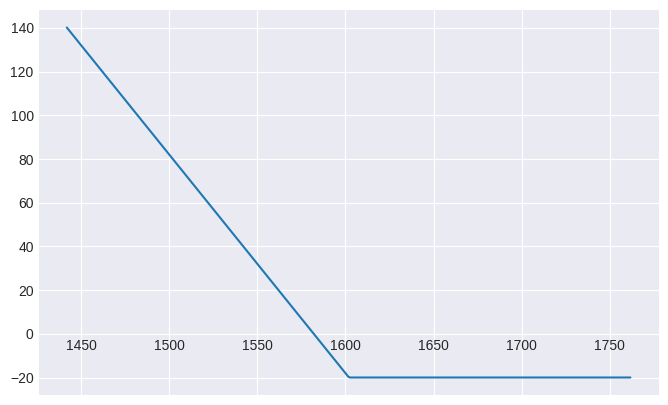

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(st, long_put_payoff, label='Put option buyer payoff')


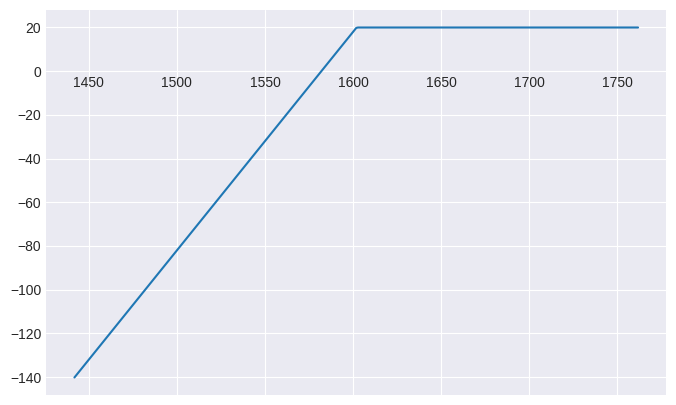

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(st, short_put_payoff, label='Put option seller payoff')


In [11]:
def call_payoff(st, strike_price, premium):
  pnl=np.where(st>strike_price, strike_price-st, 0)
  return pnl-premium

st=np.arange(0.9*spot_price, 1.1*spot_price)
long_call_payoff = call_payoff(st, strike_price, premium)
short_call_payoff = long_call_payoff*-1.0

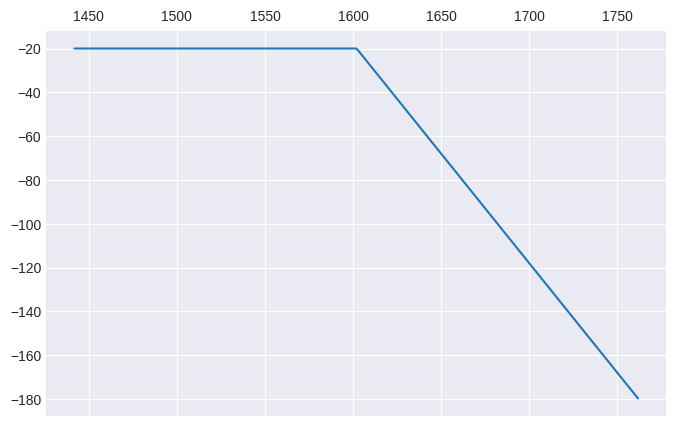

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(st, long_call_payoff, label='Call option buyer payoff')

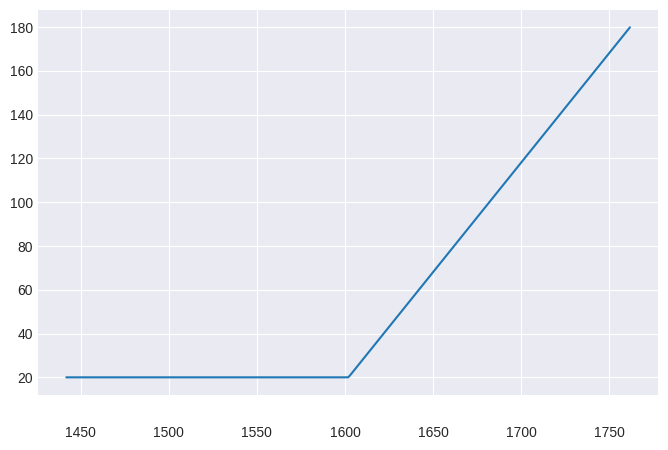

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.spines['bottom'].set_position('zero')
ax.plot(st, short_call_payoff, label='Call option seller payoff')


#Option strategies

Till now, we saw payoffs of call and put options for long and short trade. Now, let's have a look at different option strategies:
1. Bull Call Spread
2. Bull Put spread
3. Bear Call spread
4. Bear Put spread
5. Long Straddle
6. Short Straddle
7. Long Strangle
8. Short Strangle
9. Iron Condor
10. Butterfly Spread

In [14]:
spot_price

np.float64(1602.0)

In [15]:
# Bull Call Spread

def bull_call(st, strike_long_call, strike_short_call, pcall_long, pcall_short):
  premium_paid=pcall_long-pcall_short
  payoff_long_call=np.maximum(st-strike_long_call, 0)
  payoff_short_call=-np.maximum(st-strike_short_call, 0)
  final_payoff=payoff_long_call+payoff_short_call-premium_paid
  return final_payoff

In [17]:
final=bull_call(st, spot_price-20, spot_price+20, 5, 3)

st=np.arange(0.9*spot_price, 1.1*spot_price)


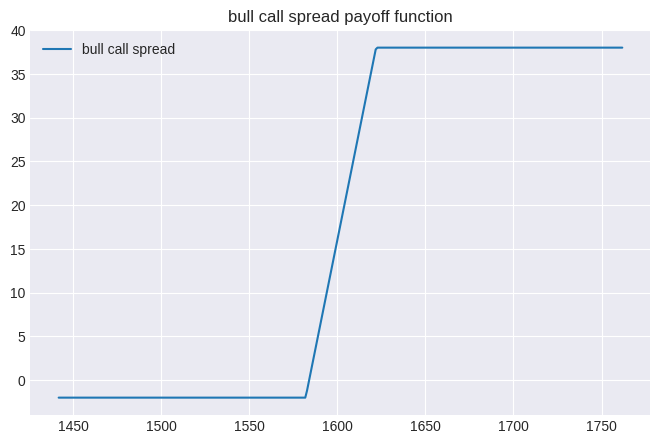

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(st, final, label='bull call spread')
plt.title('bull call spread payoff function')
plt.legend()
plt.grid(True)
plt.show()

Bull put spread

Sell 1 put at higher strike price and bull 1 put at lower strike price

net credit strategy.

In [19]:
# Bull put spread

def bull_put(st, strike_price_long, strike_price_short, pput_short, pput_long):
  premium_received=pput_short-pput_long
  payoff_short_put=-np.maximum(strike_price_short-st, 0)
  payoff_long_put=np.maximum(strike_price_long-st, 0)
  final_payoff=payoff_short_put+payoff_long_put+premium_received
  return final_payoff

In [20]:
final=bull_put(st, spot_price-20, spot_price+20, 5, 3)

st=np.arange(0.9*spot_price, 1.1*spot_price)


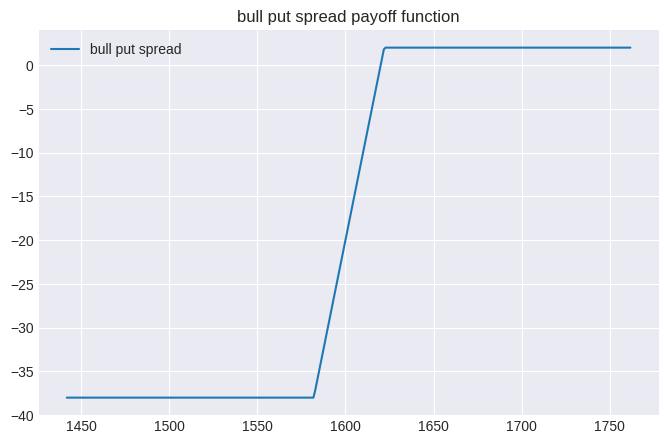

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(st, final, label='bull put spread')
plt.title('bull put spread payoff function')
plt.legend()
plt.grid(True)
plt.show()

Bear Call spread

Sell 1 call at lower strike price and buy 1 call at higher strike price

high strike price -> less premium cost

net credit strategy.

In [22]:
def bear_call(st, strike_price_short, strike_price_long, pcall_short, pcall_long):
  payoff_short_call=-np.maximum(st-strike_price_short, 0)
  payoff_long_call=np.maximum(st-strike_price_long, 0)
  premium_received=pcall_short-pcall_long
  final_payoff=premium_received+payoff_short_call+payoff_long_call
  return final_payoff

In [23]:
final=bear_call(st, spot_price-20, spot_price+20, 5, 3)

st=np.arange(0.9*spot_price, 1.1*spot_price)

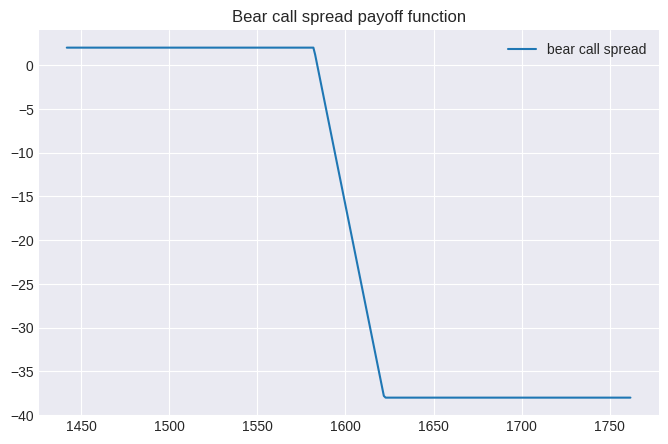

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(st, final, label='bear call spread')
plt.title('Bear call spread payoff function')
plt.legend()
plt.grid(True)
plt.show()

Bear put spread

buy 1 put at higher strike price
sell 1 piut at lower strike price

for put option, high strike price -> more premium,
premium is paid -> debit strategy

In [25]:
def bear_put(st, strike_long_put, strike_short_put, pput_long, pput_short):
  payoff_short_put=-np.maximum(strike_short_put-st, 0)
  payoff_long_put=np.maximum(strike_long_put-st, 0)
  premium_paid=pput_long-pput_short
  final_payoff=payoff_long_put+payoff_short_put-premium_paid
  return final_payoff

In [26]:

final=bear_put(st, spot_price+20, spot_price-20, 5, 3)

st=np.arange(0.9*spot_price, 1.1*spot_price)

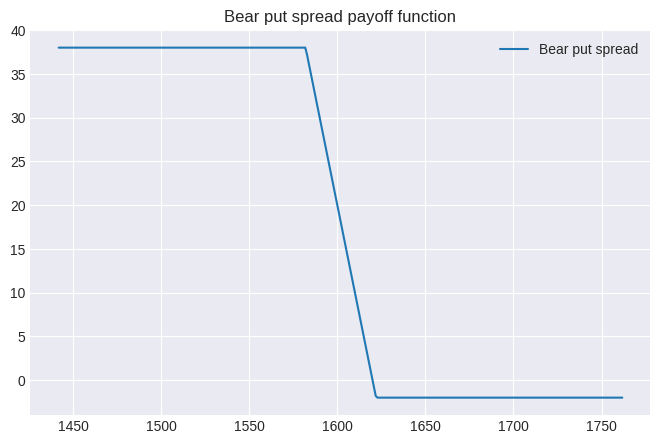

In [27]:
plt.figure(figsize=(8,5))
plt.plot(st, final, label='Bear put spread')
plt.title('Bear put spread payoff function')
plt.legend()
plt.grid(True)
plt.show()

Spread have different strike price whereas the straddle have same srtike price. also, in case of spread we are expecting the stock to move in a particular direction but in this case, we tske volatility into account.

1 call ATM and 1 put ATM involved.

long straddle:
options are bought.
we expect high volatility but dont know what direction the market will move.

In [28]:
def long_straddle(st, strike_price, pput_long, pcall_long):
  payoff_long_call=np.maximum(st-strike_price, 0)
  payoff_long_put=np.maximum(strike_price-st, 0)
  premium_paid=pcall_long+pput_long
  final_payoff=payoff_long_call+payoff_long_put-premium_paid
  return final_payoff

In [29]:
final = long_straddle(st, spot_price, 5, 5)
st=np.arange(0.9*spot_price, 1.1*spot_price)

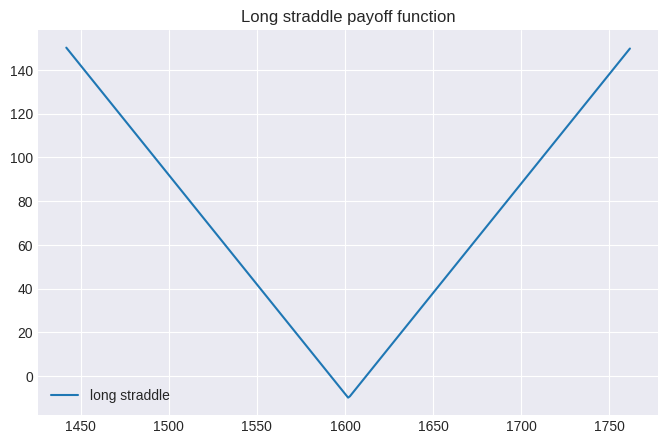

In [30]:
plt.figure(figsize=(8,5))
plt.title("Long straddle payoff function")
plt.plot(st, final, label='long straddle')
plt.legend()
plt.grid(True)
plt.show()

Short straddle: we expect the volatility to be low. IT is expected to stay flat near the strike price.

Sell 1 ATM call and 1 ATM put

In [31]:
def short_straddle(st, strike_price, pput_short, pcall_short):
  payoff_short_call=-np.maximum(st-strike_price, 0)
  payoff_short_put=-np.maximum(strike_price-st, 0)
  premium_received=pcall_short+pput_short
  final_payoff=payoff_short_call+payoff_short_put+premium_received
  return final_payoff


In [32]:
final = short_straddle(st, spot_price, 5, 5)
st=np.arange(0.9*spot_price, 1.1*spot_price)

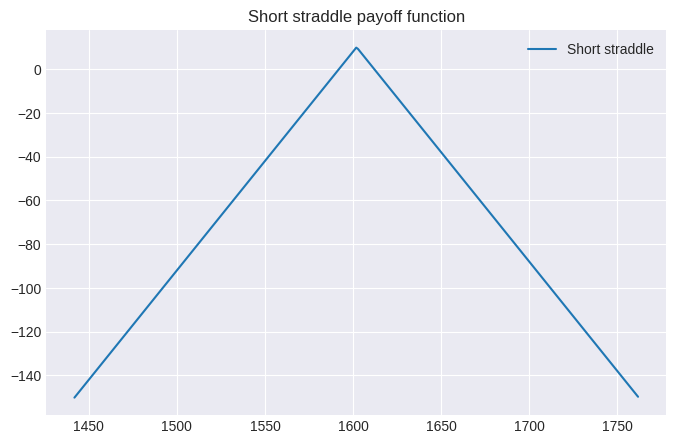

In [33]:

plt.figure(figsize=(8,5))
plt.title("Short straddle payoff function")
plt.plot(st, final, label='Short straddle')
plt.legend()
plt.grid(True)
plt.show()

Long strangle: buy 1 OTM call, 1 OTM put with different strike prices and same expiry.
when we expect the price to vary very much but don't know in which direction

In [34]:
def long_strangle(st, strike_price_call, strike_price_put, pcall, pput):
  payoff_long_call=np.maximum(st-strike_price_call, 0)
  payoff_long_put=np.maximum(strike_price_put-st, 0)
  premium_paid=pput+pcall
  final_payoff=payoff_long_call+payoff_long_put-premium_paid
  return final_payoff

In [36]:
final = long_strangle(st, spot_price+20, spot_price-20, 5, 3)
st=np.arange(0.9*spot_price, 1.1*spot_price)

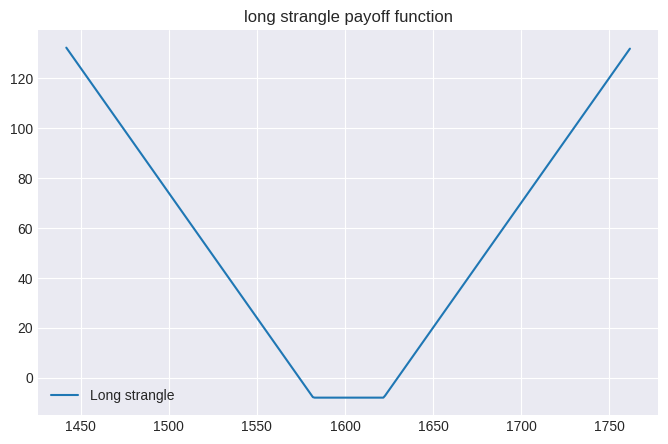

In [37]:
plt.figure(figsize=(8,5))
plt.title("long strangle payoff function")
plt.plot(st, final, label='Long strangle')
plt.legend()
plt.grid(True)
plt.show()

Short strangle: sell 1 OTM call, 1 OTM put with different strike prices and same expiry. when we expect the price to be stable

In [38]:
def short_strangle(st, strike_price_call, strike_price_put, pcall, pput):
  payoff_short_call=-np.maximum(st-strike_price_call, 0)
  payoff_short_put=-np.maximum(strike_price_put-st, 0)
  premium_paid=pput+pcall
  final_payoff=payoff_short_call+payoff_short_put-premium_paid
  return final_payoff

In [41]:
final = short_strangle(st, spot_price+20, spot_price-20, 5, 3)
st=np.arange(0.9*spot_price, 1.1*spot_price)

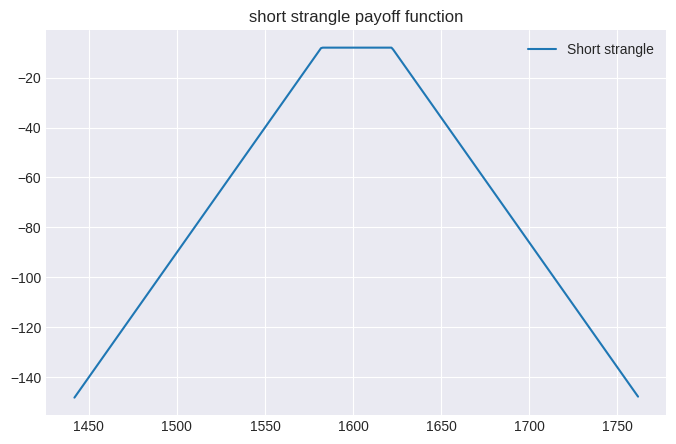

In [42]:
plt.figure(figsize=(8,5))
plt.title("short strangle payoff function")
plt.plot(st, final, label='Short strangle')
plt.legend()
plt.grid(True)
plt.show()

Iron Condor: sell 1 OTM call, and buy 1 further OTM call, sell 1 OTM put, and buy 1 further OTM put. It is a wider version of short strangle in with protection. It is when you expect the price to stay in a tight range

In [62]:
def iron_condor(st, strike_price_short_call, strike_price_long_call, strike_price_short_put, strike_price_long_put, pcall_short, pcall_long,pput_short, pput_long ):
  payoff_short_call=-np.maximum(st-strike_price_short_call, 0)
  payoff_long_call=np.maximum(st-strike_price_long_call, 0)
  payoff_short_put=-np.maximum(strike_price_short_put-st, 0)
  payoff_long_put=np.maximum(strike_price_long_put-st, 0)
  premium_paid=pput_long-pput_short+pcall_long-pcall_short
  final_payoff=payoff_long_call+payoff_short_call+payoff_long_put+payoff_short_put-premium_paid
  return final_payoff

In [63]:
final = iron_condor(st, spot_price+20, spot_price+40, spot_price-20, spot_price-40,5, 3, 6, 4)
st=np.arange(0.9*spot_price, 1.1*spot_price)

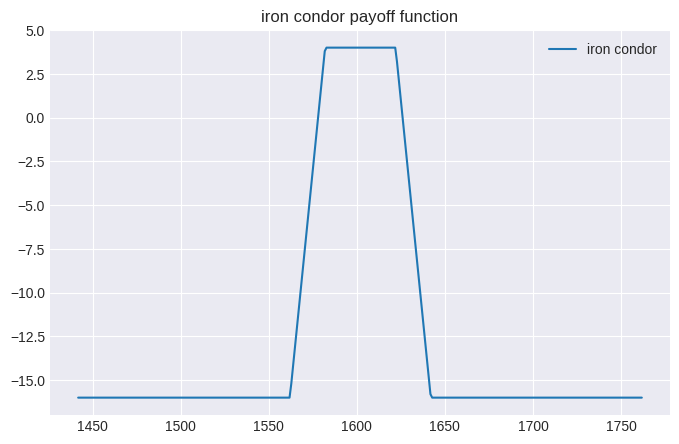

In [65]:
plt.figure(figsize=(8,5))
plt.title("iron condor payoff function")
plt.plot(st, final, label='iron condor')
plt.legend()
plt.grid(True)
plt.show()

butterfky soread: buy 1 call at lower strike, sell 2 calls at middle strike and buy 1 call at higher strike.
This strategy is used when we expect very low volatility and the stock to close near the middle strike price.

In [67]:
def butterfly_spread(st, strike_price_lower_call, strike_price_middle_call, strike_price_higher_call, pcall_lower, pcall_higher, pcall_middle):
  payoff_long_call_lower=np.maximum(st-strike_price_lower_call, 0)
  payoff_short_call=2*(-np.maximum(st-strike_price_middle_call, 0))
  payoff_long_call_higher=np.maximum(st-strike_price_higher_call, 0)
  premium_paid=pcall_lower+pcall_higher-2*pcall_middle
  final_payoff=payoff_long_call_higher+payoff_long_call_lower+payoff_short_call
  return final_payoff

In [83]:
final = butterfly_spread(st, spot_price-20, spot_price, spot_price+20, 5, 3, 3.5)
st=np.arange(0.9*spot_price, 1.1*spot_price)

In [84]:
final.ndim

1

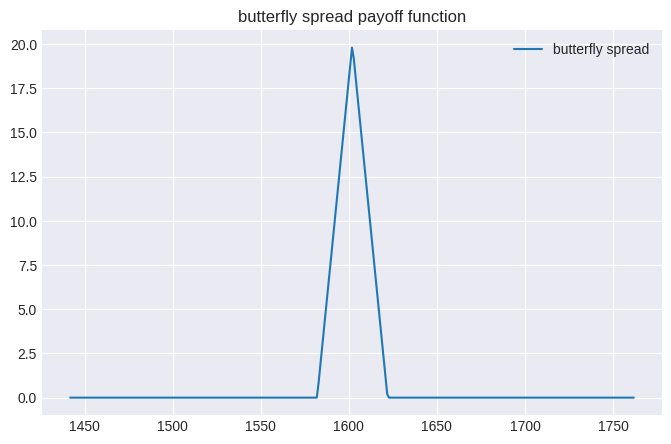

In [85]:
plt.figure(figsize=(8,5))
plt.title("butterfly spread payoff function")
plt.plot(st, final, label='butterfly spread')
plt.legend()
plt.grid(True)
plt.show()